<a href="https://colab.research.google.com/github/kr1k-boop/Analysis-of-Influence-of-Internet-on-National-Development/blob/main/NewModels_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install regressors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#load dataset
df = pd.read_csv('cleaned_data.csv') 
df = df.drop(['Unnamed: 0'], axis = 1)
print(df.shape)
df.describe()

(429, 57)


,1.1.4) Gender gap in internet access,1.2.2) Average fixed broadband download speed,1.2.7) Bandwidth capacity,1.3.1) Network coverage (min. 2G),1.3.2) Network coverage (min. 3G),1.3.3) Network coverage (min. 4G),1.3.5) Government initiatives to make Wi-Fi available,1.3.6) Private sector initiatives to make Wi-Fi available,1.4.1) Urban electricity access,1.4.2) Rural electricity access,2.1.1) Smartphone cost (handset),2.1.2) Mobile phone cost (prepaid tariff),2.1.3) Mobile phone cost (postpaid tariff),2.1.4) Fixed-line monthly broadband cost,2.2.2) Wireless operators' market share,2.2.3) Broadband operators' market share,3.1.1) Availability of local news in local languages,3.1.2) Concentration of websites using country-level domains,3.1.3) Availability of e-Government services in the local language,3.2.1) e-Finance content,3.2.3) e-Health content,3.2.5) e-Entertainment usage,3.2.6) e-Commerce content,3.2.8) Open data policies,4.1.1) Level of literacy,4.1.2) Educational attainment,4.1.3) Support for digital literacy,4.1.4) Level of web accessibility,4.2.1) Privacy regulations,4.2.2) Trust in online privacy,4.2.3) Trust in Government websites and apps,4.2.4) Trust in Non-government websites and apps,4.2.5) Trust in information from social media,4.2.6) e-Commerce safety,4.3.1.1) Comprehensive female e-inclusion plan,4.3.1.2) Female digital skills training plan,4.3.1.3) Female STEM education plan,4.3.2) Government e-inclusion strategy,4.3.3) National broadband strategy,4.3.4) Funding for broadband buildout,4.3.5) Technology-neutrality policy for spectrum use,4.3.6) National digital identification system,BG2) Population,BG5) GINI coefficient,BG7) Total electricity access,BG9) Percentage of schools with Internet access,BG10) Global Peace Index,BG11) Democracy Index,BG12) Corruption Perceptions Index,BG13) EIU Business Environment Rankings,BG14) UN E-Government Development Index,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG24) Total fixed line broadband subscribers
count,429.000000,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,15.687879,39.207133,1.426804e+05,95.944149,86.986760,68.728811,1.596737,1.317016,91.700723,76.791282,49.721212,3.54380,4.325541,26.302168,3812.209790,4475.319347,2.986014,1.841492,1.512821,1.701632,2.244755,87.820047,56.575524,1.337995,85.888578,8.709790,2.461538,1.606061,1.657343,49.634965,48.914219,33.938695,27.240093,57.917483,1.158508,0.351981,0.398601,1.456876,1.850816,0.885781,0.801865,1.783217,66.953147,38.501865,84.463473,60.646853,2.029138,5.796037,45.398601,5.932634,0.600699,6.082284,5.783217,56.037529,6.764211,6.334652,143737.376584
std,18.807892,38.214072,8.785347e+05,7.394996,18.044832,33.534190,0.750756,0.881913,16.405713,34.173803,23.906815,8.53556,6.907891,118.487428,1275.572605,2159.673885,0.988150,1.047049,0.628712,0.458076,0.804922,7.543895,24.896986,0.837205,18.191183,3.157057,0.928036,1.087766,0.727673,13.097008,11.514400,9.400566,9.389780,11.280201,0.921221,0.478146,0.490182,0.730593,0.964864,0.318449,0.399060,0.573641,188.927237,7.567086,26.000086,36.347061,0.453197,2.065359,19.028559,1.301583,0.211303,6.387836,7.644111,29.026809,10.831653,10.566943,141649.182669
min,-16.700000,2.530000,4.990000e+02,50.000000,20.000000,0.000000,0.000000,0.000000,16.400000,0.360000,0.000000,0.00500,0.002000,0.230000,11

In [ ]:
df.columns

Index(['1.1.4) Gender gap in internet access',
       '1.2.2) Average fixed broadband download speed',
       '1.2.7) Bandwidth capacity', '1.3.1) Network coverage (min. 2G)',
       '1.3.2) Network coverage (min. 3G)',
       '1.3.3) Network coverage (min. 4G)',
       '1.3.5) Government initiatives to make Wi-Fi available',
       '1.3.6) Private sector initiatives to make Wi-Fi available',
       '1.4.1) Urban electricity access', '1.4.2) Rural electricity access',
       '2.1.1) Smartphone cost (handset)',
       '2.1.2) Mobile phone cost (prepaid tariff)',
       '2.1.3) Mobile phone cost (postpaid tariff)',
       '2.1.4) Fixed-line monthly broadband cost',
       '2.2.2) Wireless operators' market share',
       '2.2.3) Broadband operators' market share',
       '3.1.1) Availability of local news in local languages',
       '3.1.2) Concentration of websites using country-level domains',
       '3.1.3) Availability of e-Government services in the local language',
       '3.2.1) e

## Separation of targets

In [ ]:
y_gini = df['BG5) GINI coefficient']
y_peace = df['BG10) Global Peace Index']
y_dem = df['BG11) Democracy Index']
y_corr = df['BG12) Corruption Perceptions Index']
y_unegov = df['BG14) UN E-Government Development Index']

In [ ]:
target_column = ['BG5) GINI coefficient', 'BG10) Global Peace Index', 'BG11) Democracy Index', 'BG12) Corruption Perceptions Index', 'BG14) UN E-Government Development Index'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,1.1.4) Gender gap in internet access,1.2.2) Average fixed broadband download speed,1.2.7) Bandwidth capacity,1.3.1) Network coverage (min. 2G),1.3.2) Network coverage (min. 3G),1.3.3) Network coverage (min. 4G),1.3.5) Government initiatives to make Wi-Fi available,1.3.6) Private sector initiatives to make Wi-Fi available,1.4.1) Urban electricity access,1.4.2) Rural electricity access,2.1.1) Smartphone cost (handset),2.1.2) Mobile phone cost (prepaid tariff),2.1.3) Mobile phone cost (postpaid tariff),2.1.4) Fixed-line monthly broadband cost,2.2.2) Wireless operators' market share,2.2.3) Broadband operators' market share,3.1.1) Availability of local news in local languages,3.1.2) Concentration of websites using country-level domains,3.1.3) Availability of e-Government services in the local language,3.2.1) e-Finance content,3.2.3) e-Health content,3.2.5) e-Entertainment usage,3.2.6) e-Commerce content,3.2.8) Open data policies,4.1.1) Level of literacy,4.1.2) Educational attainment,4.1.3) Support for digital literacy,4.1.4) Level of web accessibility,4.2.1) Privacy regulations,4.2.2) Trust in online privacy,4.2.3) Trust in Government websites and apps,4.2.4) Trust in Non-government websites and apps,4.2.5) Trust in information from social media,4.2.6) e-Commerce safety,4.3.1.1) Comprehensive female e-inclusion plan,4.3.1.2) Female digital skills training plan,4.3.1.3) Female STEM education plan,4.3.2) Government e-inclusion strategy,4.3.3) National broadband strategy,4.3.4) Funding for broadband buildout,4.3.5) Technology-neutrality policy for spectrum use,4.3.6) National digital identification system,BG2) Population,BG5) GINI coefficient,BG7) Total electricity access,BG9) Percentage of schools with Internet access,BG10) Global Peace Index,BG11) Democracy Index,BG12) Corruption Perceptions Index,BG13) EIU Business Environment Rankings,BG14) UN E-Government Development Index,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG24) Total fixed line broadband subscribers
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.180944,0.192655,0.009918,0.959441,0.869868,0.687288,0.798368,0.658508,0.917007,0.767913,0.497212,0.031102,0.093119,0.024247,0.381221,0.447532,0.746503,0.613831,0.756410,0.850816,0.748252,0.878200,0.586883,0.668998,0.858886,0.617716,0.820513,0.401515,0.828671,0.590892,0.596515,0.547398,0.486430,0.618777,0.579254,0.351981,0.398601,0.728438,0.616939,0.885781,0.801865,0.891608,0.047995,38.501865,0.844635,0.606469,2.029138,5.796037,45.398601,0.697957,0.600699,0.217224,0.098021,0.562061,0.097705,0.096883,0.311936
std,0.216931,0.187775,0.061072,0.073950,0.180448,0.335342,0.375378,0.440956,0.164057,0.341738,0.239068,0.074911,0.148710,0.109230,0.127557,0.215967,0.247037,0.349016,0.314356,0.229038,0.268307,0.075439,0.258267,0.418603,0.181912,0.223905,0.309345,0.271941,0.363836,0.155917,0.140420,0.151622,0.167675,0.120515,0.460611,0.478146,0.490182,0.365297,0.321621,0.318449,0.399060,0.286820,0.135432,7.567086,0.260001,0.363471,0.453197,2.065359,19.028559,0.153127,0.211303,0.228137,0.129561,0.291142,0.156457,0.161612,0.307405
min,-0.192618,0.012432,0.000035,0.500000,0.200000,0.000000,0.000000,0.000000,0.164000,0.003600,0.000000,0.000044,0.000043,0.000212,0.111600,0.139000,0.000000,0.000000,0.000000,0.500000,0.000000,0.640000,0.031120

In [ ]:
X = df[predictors].values

### Adjusted R square function

In [ ]:
def get_adj_r_squared(r2, n, p):
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adj_r2

## Gini coefficient - ElasticNet model

In [ ]:
#create new slice of data
X_gini = df['BG24) Total fixed line broadband subscribers']

In [ ]:
X_gini = np.array(X_gini).reshape(-1, 1)

In [ ]:
X_gini_train, X_gini_test, y_gini_train, y_gini_test = train_test_split(X_gini, y_gini, test_size=0.20, random_state=40)
print(X_gini_train.shape)
print(X_gini_test.shape)

(343, 1)
(86, 1)


In [ ]:
# define model
model_elastic = ElasticNet()
# define model evaluation method
cv_elastic = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_elastic_gini = GridSearchCV(model_elastic, grid, scoring='neg_root_mean_squared_error', cv=cv_elastic, n_jobs=-1)
# perform the search
results_gini = search_elastic_gini.fit(X_gini, y_gini)

In [ ]:
pred_train_enet_gini= search_elastic_gini.predict(X_gini_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_gini_train,pred_train_enet_gini)))
print("R^2 for training set", r2_score(y_gini_train, pred_train_enet_gini))

pred_test_enet_gini= search_elastic_gini.predict(X_gini_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_gini_test,pred_test_enet_gini)))
print("R^2 for test set", get_adj_r_squared(r2_score(y_gini_test, pred_test_enet_gini),429,1))

RMSE score for training set 6.886712222979056
R^2 for training set 0.2261658383865216
RMSE score for test set 6.452150466474243
R^2 for test set -0.02985905526108734


## World Peace - ElasticNet model

In [ ]:
#create new slice of data
predictors_peace = ['1.1.4) Gender gap in internet access','1.2.2) Average fixed broadband download speed', '2.1.1) Smartphone cost (handset)', '3.2.6) e-Commerce content', 'BG9) Percentage of schools with Internet access', 'BG24) Total fixed line broadband subscribers']
df[predictors_peace] = df[predictors_peace]/df[predictors_peace].max()

In [ ]:
X_peace = df[predictors_peace].values

In [ ]:
X_peace_train, X_peace_test, y_peace_train, y_peace_test = train_test_split(X_peace, y_peace, test_size=0.20, random_state=40)
print(X_peace_train.shape)
print(X_peace_test.shape)

(343, 6)
(86, 6)


In [ ]:
# define model
model_elastic = ElasticNet()
# define model evaluation method
cv_elastic = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_elastic_peace = GridSearchCV(model_elastic, grid, scoring='neg_root_mean_squared_error', cv=cv_elastic, n_jobs=-1)
# perform the search
results_peace = search_elastic_peace.fit(X_peace, y_peace)

In [ ]:
pred_train_enet_peace= search_elastic_peace.predict(X_peace_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_peace_train,pred_train_enet_peace)))
print("R^2 for training set", r2_score(y_peace_train, pred_train_enet_peace))

pred_test_enet_peace= search_elastic_peace.predict(X_peace_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_peace_test,pred_test_enet_peace)))
print("R^2 for test set", get_adj_r_squared(r2_score(y_peace_test, pred_test_enet_peace),429,6))

RMSE score for training set 0.37647052269151243
R^2 for training set 0.2980447610298588
RMSE score for test set 0.3776987514386919
R^2 for test set 0.32569972222573595


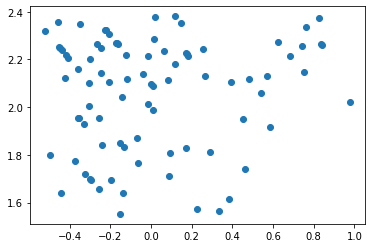

In [ ]:
residuals = y_peace_test - pred_test_enet_peace
plt.scatter(residuals, pred_test_enet_peace)
plt.show()

In [ ]:
vif_data_peace = pd.DataFrame()
vif_data_peace["feature"] = predictors_peace
  
# calculating VIF for each feature
vif_data_peace["VIF"] = [variance_inflation_factor(X_peace, i)
                          for i in range(len(predictors_peace))]
vif_data_peace

,feature,VIF
0,1.1.4) Gender gap in internet access,1.579659
1,1.2.2) Average fixed broadband download speed,4.863063
2,2.1.1) Smartphone cost (handset),16.073119
3,3.2.6) e-Commerce content,32.226466
4,BG9) Percentage of schools with Internet access,14.911012
5,BG24) Total fixed line broadband subscribers,8.484875


In [ ]:
variables = list(df[predictors].columns)
coefficients_elastic_peace = search_elastic_peace.best_estimator_.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_elastic_peace):
  print(colname, ":", coef)

4.3.4) Funding for broadband buildout : -0.0
2.1.4) Fixed-line monthly broadband cost : -0.27357473298892493
BG9) Percentage of schools with Internet access : -0.21575681171714833
4.1.4) Level of web accessibility : -0.09162126177582154
4.3.5) Technology-neutrality policy for spectrum use : -0.08758919822582026
BG20) Male internet users : -0.33460587503209654


## Democracy Index - Ridge model

In [ ]:
#create new slice of data
predictors_dem = ['1.2.2) Average fixed broadband download speed', '2.1.1) Smartphone cost (handset)', '2.2.3) Broadband operators\' market share', '3.2.6) e-Commerce content', '4.1.2) Educational attainment', '4.2.5) Trust in information from social media', 'BG9) Percentage of schools with Internet access','BG10) Global Peace Index', 'BG11) Democracy Index', 'BG12) Corruption Perceptions Index', 'BG24) Total fixed line broadband subscribers']
df[predictors_dem] = df[predictors_dem]/df[predictors_dem].max()

In [ ]:
X_dem = df[predictors_dem].values

In [ ]:
X_dem_train, X_dem_test, y_dem_train, y_dem_test = train_test_split(X_dem, y_dem, test_size=0.20, random_state=40)
print(X_dem_train.shape)
print(X_dem_test.shape)

(343, 11)
(86, 11)


In [ ]:
# define model evaluation method
cv_ridge = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
alphas = np.arange(0, 1, 0.01)
#model_ridge = Ridge()
# define search
search_dem = RidgeCV(alphas=alphas, normalize = True, scoring='neg_root_mean_squared_error', cv=cv_ridge)
# perform the search
results_dem = search_dem.fit(X_dem, y_dem)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

In [ ]:
pred_train_rdem = search_dem.predict(X_dem_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_dem_train,pred_train_rdem)))
print("R^2 for training set", r2_score(y_dem_train, pred_train_rdem))

pred_test_rdem= search_dem.predict(X_dem_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_dem_test,pred_test_rdem))) 
print("R^2 for test set", get_adj_r_squared(r2_score(y_dem_test, pred_test_rdem),429,11))

RMSE score for training set 4.795086256522568e-16
R^2 for training set 1.0
RMSE score for test set 4.2653627763870517e-16
R^2 for test set 1.0


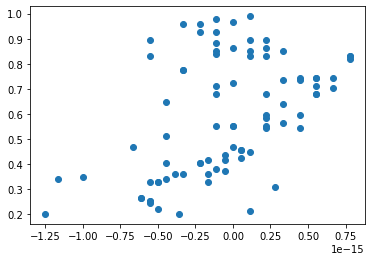

In [ ]:
residuals = y_dem_test - pred_test_rdem
plt.scatter(residuals, pred_test_rdem)
plt.show()

In [ ]:
vif_data_dem = pd.DataFrame()
vif_data_dem["feature"] = predictors_dem
  
# calculating VIF for each feature
vif_data_dem["VIF"] = [variance_inflation_factor(X_dem, i)
                          for i in range(len(predictors_dem))]
vif_data_dem

,feature,VIF
0,1.2.2) Average fixed broadband download speed,5.032462
1,2.1.1) Smartphone cost (handset),18.205773
2,2.2.3) Broadband operators' market share,7.535097
3,3.2.6) e-Commerce content,61.913005
4,4.1.2) Educational attainment,40.314049
5,4.2.5) Trust in information from social media,11.056457
6,BG9) Percentage of schools with Internet access,15.545295
7,BG10) Global Peace Index,17.651684
8,BG11) Democracy Index,17.821799
9,BG12) Corruption Perceptions Index,32.333145


## Corruption Index - Multivariate model

In [ ]:
#create new slice of data
predictors_corr = ['1.1.4) Gender gap in internet access','1.2.2) Average fixed broadband download speed', '2.1.1) Smartphone cost (handset)', '3.2.6) e-Commerce content', '4.1.3) Support for digital literacy', '4.3.1.2) Female digital skills training plan', 'BG9) Percentage of schools with Internet access', 'BG19) Internet users (percent of population)', 'BG24) Total fixed line broadband subscribers']
df[predictors_corr] = df[predictors_corr]/df[predictors_corr].max()

In [ ]:
X_corr = df[predictors_corr].values

In [ ]:
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr, y_corr, test_size=0.20, random_state=40)
print(X_corr_train.shape)
print(X_corr_test.shape)

(343, 9)
(86, 9)


In [ ]:
model_corr = LinearRegression()
model_corr.fit(X_corr_train, y_corr_train)

LinearRegression()

In [ ]:
pred_corr_train_lr= model_corr.predict(X_corr_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_corr_train,pred_corr_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_corr_train, pred_corr_train_lr))

RMSE for training data 0.11305042847800059
Coefficient of Determination for training data 0.7076855809940987


In [ ]:
pred_corr_test_lr= model_corr.predict(X_corr_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_corr_test,pred_corr_test_lr))) 
print("Coefficient of Determination for test data", get_adj_r_squared(r2_score(y_corr_test, pred_corr_test_lr), 429, 9))

RMSE for testing data 0.11802145209454955
Coefficient of Determination for test data 0.7034413842590614


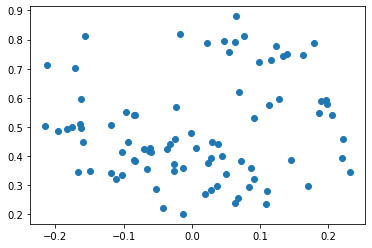

In [ ]:
residuals = y_corr_test - pred_corr_test_lr
plt.scatter(residuals, pred_corr_test_lr)
plt.show()

In [ ]:
vif_data_corr = pd.DataFrame()
vif_data_corr["feature"] = predictors_corr
  
# calculating VIF for each feature
vif_data_corr["VIF"] = [variance_inflation_factor(X_corr, i)
                          for i in range(len(predictors_corr))]
vif_data_corr

,feature,VIF
0,1.1.4) Gender gap in internet access,1.887958
1,1.2.2) Average fixed broadband download speed,4.942653
2,2.1.1) Smartphone cost (handset),18.651407
3,3.2.6) e-Commerce content,43.773667
4,4.1.3) Support for digital literacy,9.810722
5,4.3.1.2) Female digital skills training plan,1.743904
6,BG9) Percentage of schools with Internet access,17.043512
7,BG19) Internet users (percent of population),30.432051
8,BG24) Total fixed line broadband subscribers,9.149074


## UN e-Government Index - ElasticNet model

In [ ]:
#create new slice of data
predictors_unegov = ['1.1.4) Gender gap in internet access','1.2.2) Average fixed broadband download speed', '1.3.2) Network coverage (min. 3G)', '1.3.3) Network coverage (min. 4G)', '1.4.2) Rural electricity access', '2.1.1) Smartphone cost (handset)', '2.1.3) Mobile phone cost (postpaid tariff)', '2.2.3) Broadband operators\' market share', '3.1.3) Availability of e-Government services in the local language', '3.2.3) e-Health content', '3.2.6) e-Commerce content', '4.1.1) Level of literacy', '4.1.2) Educational attainment', '4.3.1.1) Comprehensive female e-inclusion plan', 'BG7) Total electricity access', 'BG9) Percentage of schools with Internet access', 'BG18) Mobile phone access gender gap', 'BG19) Internet users (percent of population)','BG24) Total fixed line broadband subscribers']
df[predictors_unegov] = df[predictors_unegov]/df[predictors_unegov].max()

In [ ]:
X_unegov = df[predictors_unegov].values

In [ ]:
X_unegov_train, X_unegov_test, y_unegov_train, y_unegov_test = train_test_split(X_unegov, y_unegov, test_size=0.20, random_state=40)
print(X_unegov_train.shape)
print(X_unegov_test.shape)

(343, 19)
(86, 19)


In [ ]:
# define model
model_elastic = ElasticNet()
# define model evaluation method
cv_elastic = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_elastic_unegov = GridSearchCV(model_elastic, grid, scoring='neg_root_mean_squared_error', cv=cv_elastic, n_jobs=-1)
# perform the search
results_unegov = search_elastic_unegov.fit(X_unegov, y_unegov)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.576e-01, tolerance: 1.911e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
pred_train_enet_unegov = search_elastic_unegov.predict(X_unegov_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_unegov_train,pred_train_enet_unegov)))
print("R^2 for training set", get_adj_r_squared(r2_score(y_unegov_train, pred_train_enet_unegov),429,19))

pred_test_enet_unegov= search_elastic_unegov.predict(X_unegov_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_unegov_test,pred_test_enet_unegov)))
print("R^2 for test set", get_adj_r_squared(r2_score(y_unegov_test, pred_test_enet_unegov),429,19)) 

RMSE score for training set 0.06051697747897836
R^2 for training set 0.9125665092092782
RMSE score for test set 0.06896652390509726
R^2 for test set 0.893346876959398


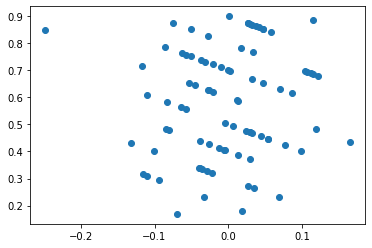

In [ ]:
residuals = y_unegov_test - pred_test_enet_unegov
plt.scatter(residuals, pred_test_enet_unegov)
plt.show()

In [ ]:
vif_data_unegov = pd.DataFrame()
vif_data_unegov["feature"] = predictors_unegov
  
# calculating VIF for each feature
vif_data_unegov["VIF"] = [variance_inflation_factor(X_unegov, i)
                          for i in range(len(predictors_unegov))]
vif_data_unegov

,feature,VIF
0,1.1.4) Gender gap in internet access,7.064886
1,1.2.2) Average fixed broadband download speed,5.074834
2,1.3.2) Network coverage (min. 3G),89.272306
3,1.3.3) Network coverage (min. 4G),21.785290
4,1.4.2) Rural electricity access,87.443350
5,2.1.1) Smartphone cost (handset),20.982958
6,2.1.3) Mobile phone cost (postpaid tariff),2.476096
7,2.2.3) Broadband operators' market share,7.684396
8,3.1.3) Availability of e-Government services i...,13.845670
9,3.2.3) e-Health content,17.936286


In [ ]:
variables = list(df[predictors].columns)
coefficients_elastic_unegov = search_elastic_unegov.best_estimator_.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_elastic_unegov):
  print(colname, ":", coef)

4.3.4) Funding for broadband buildout : 0.04399638546345381
2.1.4) Fixed-line monthly broadband cost : 0.04358106621627991
BG9) Percentage of schools with Internet access : 0.020313566701302903
4.1.4) Level of web accessibility : 0.08559663675362454
4.3.5) Technology-neutrality policy for spectrum use : 0.13179956602987516
BG20) Male internet users : 0.06430125602093525
4.1.1) Level of literacy : -0.01913372042922991
1.3.1) Network coverage (min. 2G) : -0.06933087829120724
2.1.1) Smartphone cost (handset) : 0.029677236766651186
2.2.3) Broadband operators' market share : 0.02415211782269197
3.2.3) e-Health content : 0.09911129043925875
3.2.8) Open data policies : 0.1301182933763592
BG13) EIU Business Environment Rankings : 0.04805917596697821
BG19) Internet users (percent of population) : 0.012023666588240906
2.2.2) Wireless operators' market share : -0.13217874690772202
3.1.3) Availability of e-Government services in the local language : 0.021219038292757966
1.3.5) Government initiativ